## Predicting material properties using artificial neural networks

We will construct an artificial neural network using the Keras package https://keras.io/



In [29]:
from magpy import core as c
from magpy import parse as p

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
import keras.models as km
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.layers import Dropout

In [21]:
# PREPARE DATA
# path to the chosen embedding file (representation of atomic data in normalised vector form)
embed_f = r".\magpy_data\elem_embedding.json"

mat_f = r".\magpy_data\bandgap_example.csv"
mat_df = pd.read_csv(mat_f)
materials = mat_df['composition'].apply(''.join)

X = c.descriptors(materials, embed_f, operations=["wmean", "wstd", "max", "min"])
y = mat_df["Eg (eV)"]


Now we will construct our ANN model using Keras. The model (weights) will be saved as a Hierarchical Data Format (.h5)file.

In [26]:
# CONSTRUCT ANN 
# split into training and test, 70:30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

def network(dim, regress=False):
    model = Sequential()
    model.add(Dense(400, input_dim=544, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(200, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(100, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(50, activation="relu"))
    model.add(Dropout(0.2))
    if regress:
        model.add(Dense(1, activation="linear"))
    return model

model = network(X_train.shape[1], regress=True)
# lr = learning rate
opt = Adam(lr=1e-3, beta_1=0.9, beta_2=0.999)
model.compile(loss="mean_squared_error", optimizer=opt, metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [33]:
# run model
H = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=100, verbose=1)
model.save('model_mse_dropout_normal.h5')


Train on 3581 samples, validate on 1535 samples
Epoch 1/100
3581/3581 [==============================] - 0s 115us/step - loss: 0.8711 - accuracy: 0.2879 - val_loss: 0.8881 - val_accuracy: 0.3127
Epoch 2/100
3581/3581 [==============================] - 0s 109us/step - loss: 0.8295 - accuracy: 0.2954 - val_loss: 0.8040 - val_accuracy: 0.3205
Epoch 3/100
3581/3581 [==============================] - 1s 157us/step - loss: 0.8189 - accuracy: 0.2996 - val_loss: 0.9754 - val_accuracy: 0.3362
Epoch 4/100
3581/3581 [==============================] - 0s 109us/step - loss: 0.8822 - accuracy: 0.2957 - val_loss: 0.8348 - val_accuracy: 0.3081
Epoch 5/100
3581/3581 [==============================] - 0s 103us/step - loss: 0.8103 - accuracy: 0.2927 - val_loss: 0.7499 - val_accuracy: 0.3127
Epoch 6/100
3581/3581 [==============================] - 0s 109us/step - loss: 0.7958 - accuracy: 0.2932 - val_loss: 0.7616 - val_accuracy: 0.3336
Epoch 7/100
3581/3581 [==============================] - 0s 101us/step

3581/3581 [==============================] - 0s 137us/step - loss: 0.5831 - accuracy: 0.3359 - val_loss: 0.6556 - val_accuracy: 0.3511
Epoch 57/100
3581/3581 [==============================] - 0s 98us/step - loss: 0.5136 - accuracy: 0.3368 - val_loss: 0.6324 - val_accuracy: 0.3505
Epoch 58/100
3581/3581 [==============================] - 0s 98us/step - loss: 0.5828 - accuracy: 0.3385 - val_loss: 0.8887 - val_accuracy: 0.3537
Epoch 59/100
3581/3581 [==============================] - 0s 98us/step - loss: 0.5877 - accuracy: 0.3387 - val_loss: 0.6503 - val_accuracy: 0.3524
Epoch 60/100
3581/3581 [==============================] - 0s 98us/step - loss: 0.5249 - accuracy: 0.3385 - val_loss: 0.6395 - val_accuracy: 0.3427
Epoch 61/100
3581/3581 [==============================] - 0s 109us/step - loss: 0.5032 - accuracy: 0.3354 - val_loss: 0.6443 - val_accuracy: 0.3583
Epoch 62/100
3581/3581 [==============================] - 0s 134us/step - loss: 0.5240 - accuracy: 0.3373 - val_loss: 0.7340 - va

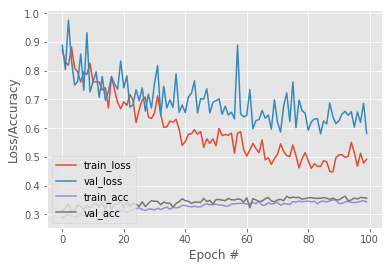

In [34]:
plt.style.use("ggplot")
plt.figure()
plt.plot(H.history["loss"], label="train_loss")
plt.plot(H.history["val_loss"], label="val_loss")
plt.plot(H.history["accuracy"], label="train_acc")
plt.plot(H.history["val_accuracy"], label="val_acc")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()
plt.savefig("loss_acc.png")